# Soil Data Wrangling

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.sparse import dok_matrix
import shapely.wkt
from shapely.geometry import Point
import sqlite3

In [145]:
conn = sqlite3.connect('../data/fires.sqlite')

df_county = pd.read_sql_query("select * from county", conn, index_col='fips')

conn.close()

df_county

,name,latitude,longitude,lat,long,geo_multipolygon
fips,,,,,,
6001,Alameda,37.648081,-121.913304,37.6,-121.9,MULTIPOLYGON (((-122.3110971410252 37.86340197...
6003,Alpine,38.617610,-119.798999,38.6,-119.8,MULTIPOLYGON (((-119.93538249202298 38.8084818...
6005,Amador,38.443550,-120.653856,38.4,-120.7,MULTIPOLYGON (((-120.25874105290194 38.5799975...
6007,Butte,39.665959,-121.601919,39.7,-121.6,MULTIPOLYGON (((-121.6354363647807 40.00088422...
6009,Calaveras,38.187844,-120.555115,38.2,-120.6,MULTIPOLYGON (((-120.2108859831663 38.50000349...
6011,Colusa,39.177739,-122.237563,39.2,-122.2,MULTIPOLYGON (((-122.73921306662827 39.3833758...
6013,Contra Costa,37.919479,-121.951543,37.9,-122.0,MULTIPOLYGON (((-121.58275011406434 38.0990424...
6015,Del Norte,41.749903,-123.980998,41.7,-124.0,MULTIPOLYGON (((-124.21284783991833 41.8708173...
6017,El Dorado,38.785532,-120.534398,38.8,-120.5,MULTIPOLYGON (((-120.29459860968026 39.0239644...


Calculate the geographic boundaries for California as a reference.

In [5]:
ca_bounds = [-180, 90, 180, -90]

for i, county in df_county.iterrows():
  name = county['name']
  geo = shapely.wkt.loads(county['geo_multipolygon'])

  # East
  if (geo.bounds[0] > ca_bounds[0]):
    ca_bounds[0] = geo.bounds[0]

  # South
  if (geo.bounds[1] < ca_bounds[1]):
    ca_bounds[1] = geo.bounds[1]

  # West
  if (geo.bounds[2] < ca_bounds[2]):
    ca_bounds[2] = geo.bounds[2]

  # Norht
  if (geo.bounds[3] > ca_bounds[3]):
    ca_bounds[3] = geo.bounds[3]

ca_bounds = tuple(ca_bounds)
print(f'California bounds (east-south, west-north): {ca_bounds}')

California bounds (east-south, west-north): (-116.10618166434291, 32.53402817678555, -123.51814169611895, 42.009834867689875)


Load the `soil.csv` per county, from the [drought and soil Kaggle project](https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data?select=soil_data.csv).

In [122]:
conn = sqlite3.connect('../data/fires.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS soil')
cur.execute('''CREATE TABLE soil (
	long										REAL NOT NULL,
	lat											REAL NOT NULL,
	fips										INTEGER NOT NULL,
	latitude								REAL NOT NULL,
	longitude								REAL NOT NULL,
	elevation								INTEGER NOT NULL,
	slope_005								REAL NOT NULL,
	slope_005_02						REAL NOT NULL,
	slope_02_05							REAL NOT NULL,
	slope_05_10							REAL NOT NULL,
	slope_10_15							REAL NOT NULL,
	slope_15_30							REAL NOT NULL,
	slope_30_45							REAL NOT NULL,
	slope_45								REAL NOT NULL,
	aspect_north						REAL NOT NULL,
	aspect_east							REAL NOT NULL,
	aspect_south						REAL NOT NULL,
	aspect_west							REAL NOT NULL,
	aspect_unknown					REAL NOT NULL,
	water_land							REAL NOT NULL,
	barren_land							REAL NOT NULL,
	urban_land							REAL NOT NULL,
	grass_land							REAL NOT NULL,
	forest_land							REAL NOT NULL,
	partial_cultivated_land	REAL NOT NULL,
	irrigated_land					REAL NOT NULL,
	cultivated_land					REAL NOT NULL,
	nutrient								INTEGER NOT NULL,
	nutrient_retention			INTEGER NOT NULL,
	rooting									INTEGER NOT NULL,
	oxygen									INTEGER NOT NULL,
	excess_salts						INTEGER NOT NULL,
	toxicity								INTEGER NOT NULL,
	workability							INTEGER NOT NULL
)''')

cur.execute('DROP INDEX IF EXISTS idx_soil_fips')
cur.execute('CREATE INDEX idx_soil_fips ON soil(fips)')

cur.execute('DROP INDEX IF EXISTS idx_soil_lat_long')
cur.execute('CREATE INDEX idx_soil_lat_long ON soil(lat, long)')

df_soil_county = pd.read_csv('../data/soil.csv')
df_soil_county['lat'] = round(df_soil_county['latitude'] * 10) / 10
df_soil_county['long'] = round(df_soil_county['longitude'] * 10) / 10

df_soil_county = df_soil_county[df_soil_county['fips'].isin(df_county.fips)]

df_soil_county.to_sql('soil', conn, if_exists='append', index=False)

conn.commit()
conn.close()

Load soil data for each 5 min latitude/longitude grid cells for soil data from the Harmonized World Soil Database v 1.2[<sup>1</sup>](#Acknowledgements).

In [89]:
conn = sqlite3.connect('../data/fires.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS soil_geo')
cur.execute('''CREATE TABLE soil_geo (
	long										REAL NOT NULL,
	lat											REAL NOT NULL,
	fips										INTEGER NOT NULL,
	elevation								INTEGER NOT NULL,
	slope_005								REAL NOT NULL,
	slope_005_02						REAL NOT NULL,
	slope_02_05							REAL NOT NULL,
	slope_05_10							REAL NOT NULL,
	slope_10_15							REAL NOT NULL,
	slope_15_30							REAL NOT NULL,
	slope_30_45							REAL NOT NULL,
	slope_45								REAL NOT NULL,
	aspect_north						REAL NOT NULL,
	aspect_east							REAL NOT NULL,
	aspect_south						REAL NOT NULL,
	aspect_west							REAL NOT NULL,
	water_land							REAL NOT NULL,
	barren_land							REAL NOT NULL,
	urban_land							REAL NOT NULL,
	grass_land							REAL NOT NULL,
	forest_land							REAL NOT NULL,
	partial_cultivated_land	REAL NOT NULL,
	irrigated_land					REAL NOT NULL,
	cultivated_land					REAL NOT NULL,
	nutrient								INTEGER NOT NULL,
	rooting									INTEGER NOT NULL,
	oxygen									INTEGER NOT NULL,
	excess_salts						INTEGER NOT NULL,
	toxicity								INTEGER NOT NULL,
	workability							INTEGER NOT NULL,
	PRIMARY KEY							(long, lat)
)''')

# Just get headers
df_soil = pd.read_sql_query("""select * from soil_geo where 1=0""", conn)

conn.commit()
conn.close()

In [29]:
from scipy.sparse import dok_matrix

def make_sparse(path, dtype='int'):
    with open(path, 'r') as file:
        cols, rows = int(file.readline().split()[1]), int(file.readline().split()[1])
        x_corner, y_corner = int(file.readline().split()[1]), int(file.readline().split()[1])
        cellsize = float(file.readline().split()[1])
        nodata_val = file.readline().split()[1]
        line = file.readline()

        if dtype == 'int':
            matrix = dok_matrix((rows, cols), dtype='int')
        if dtype == 'float':
            matrix = dok_matrix((rows, cols), dtype='float')

        empty_line = ' ' + ' '.join([nodata_val] * cols) + '\n'

        for i in range(rows):
            if empty_line != line:
                for j, val in enumerate(line.split()):
                    if val != nodata_val:
                        if dtype == 'int':
                            matrix[i,j] = int(val)
                        if dtype == 'float':
                            matrix[i,j] = float(val)

            line = file.readline()

        return matrix, x_corner, y_corner, cellsize

In [13]:
def long_lat2xy(long, lat, x_corner, y_corner, cellsize):
    return abs(int(round((lat + y_corner)/cellsize))), int(round((long - x_corner)/cellsize))

In [12]:
def xy2long_lat(x, y, x_corner, y_corner, cellsize):
    return (x_corner + (y * cellsize)), (abs(y_corner) - (x * cellsize))

In [33]:
def add_value(df, path, name, dtype='int'):
    matrix, x_corner, y_corner, cellsize = make_sparse(path, dtype)
    df[name] = df.arc_xy.apply(lambda x: matrix[x])
    
    return df

In [31]:
matrix, x_corner, y_corner, cellsize = make_sparse('../data/soil/GloElev_5min.asc')

In [16]:
conn = sqlite3.connect('../data/fires.sqlite')

# Get all the long/lat grid combinations
df_long_lat = pd.read_sql_query("""
  select long, lat from weather_geo
  where
    date = '2000-01-01'
""", conn)

conn.close()

In [18]:
xy_list = [long_lat2xy(row['long'], row['lat'], x_corner, y_corner, cellsize) for _, row in df_long_lat.iterrows()]

In [156]:
df_soil['long'] = df_long_lat.long
df_soil['lat'] = df_long_lat.lat
df_soil['arc_xy'] = xy_list

In [46]:
df_soil = add_value(df_soil, '../data/soil/GloElev_5min.asc', 'elevation')

In [53]:
slopes = [
    ('../data/soil/GloSlopesCl1_5min.asc', 'slope_005'),
    ('../data/soil/GloSlopesCl2_5min.asc', 'slope_005_02'),
    ('../data/soil/GloSlopesCl3_5min.asc', 'slope_02_05'),
    ('../data/soil/GloSlopesCl4_5min.asc', 'slope_05_10'),
    ('../data/soil/GloSlopesCl5_5min.asc', 'slope_10_15'),
    ('../data/soil/GloSlopesCl6_5min.asc', 'slope_15_30'),
    ('../data/soil/GloSlopesCl7_5min.asc', 'slope_30_45'),
    ('../data/soil/GloSlopesCl8_5min.asc', 'slope_45'),
]

for path, slope in slopes:
    df_soil = add_value(df_soil, path, slope)
    df_soil[slope] = df_soil[slope]/10000

In [67]:
aspects = [
    ('../data/soil/GloAspectClN_5min.asc', 'aspect_north'),
    ('../data/soil/GloAspectClE_5min.asc', 'aspect_east'),
    ('../data/soil/GloAspectClS_5min.asc', 'aspect_south'),
    ('../data/soil/GloAspectClW_5min.asc', 'aspect_west'),
]

for path, aspect in aspects:
    df_soil = add_value(df_soil, path, aspect)
    df_soil[aspect] = df_soil[aspect]/10000

In [49]:
land_covers = [
    'water_land', 'barren_land', 'urban_land', 'grass_land', 'forest_land',
    'partial_cultivated_land', 'irrigated_land', 'cultivated_land'
]

for land in land_covers:
    df_soil = add_value(df_soil, f'../data/soil/{land}.asc', land, dtype='float')

In [60]:
soil_qualities = [
    'nutrient', 'rooting', 'oxygen', 'excess_salts', 'toxicity', 'workability'
]

for quality in soil_qualities:
    df_soil = add_value(df_soil, f'../data/soil/{quality}.asc', quality, dtype='int')


In [159]:
final = df_soil.isna().sum()
cols = []
for count, col in zip(final,list(df_soil.columns)):
    if count > 0:
        cols.append(col)

print(f'Columns with null: {cols}')

Columns with null: []


In [147]:
for fips, county in df_county.iterrows():
  name = county.name
  geo = shapely.wkt.loads(county.geo_multipolygon)

  for (long, lat), soil in df_soil.iterrows():
    point = Point(long, lat)
    
    if geo.contains(point):
      df_soil.at[(long, lat), 'fips'] = fips

In [190]:
conn = sqlite3.connect('../data/fires.sqlite')

df_for_db = df_soil.drop(['arc_xy'], axis=1).sample(frac=1)
df_for_db.to_sql('soil_geo', conn, if_exists='replace', index=False)

conn.close()

In [191]:
df_for_csv = df_soil.drop(['arc_xy'], axis=1).set_index(['long', 'lat'])
df_for_csv.to_csv('../app/models/soil.csv')

In [2]:
conn = sqlite3.connect('../data/fires.sqlite')

df_from_db = pd.read_sql_query("""
  select soil_geo.* from soil_geo
  inner join weather_geo
    on weather_geo.long = soil_geo.long
    and weather_geo.lat = soil_geo.lat
    and weather_geo.date = '2000-01-01'
  order by random()
""", conn)

conn.close()

In [3]:
df_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   elevation                4160 non-null   int64  
 1   slope_005                4160 non-null   float64
 2   slope_005_02             4160 non-null   float64
 3   slope_02_05              4160 non-null   float64
 4   slope_05_10              4160 non-null   float64
 5   slope_10_15              4160 non-null   float64
 6   slope_15_30              4160 non-null   float64
 7   slope_30_45              4160 non-null   float64
 8   slope_45                 4160 non-null   float64
 9   aspect_north             4160 non-null   float64
 10  aspect_east              4160 non-null   float64
 11  aspect_south             4160 non-null   float64
 12  aspect_west              4160 non-null   float64
 13  water_land               4160 non-null   float64
 14  barren_land             

In [198]:
df_from_db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
elevation,4160.0,848.541106,722.213151,-8.100000e+01,237.000000,704.500000,1310.000000,3656.000000
slope_005,4160.0,0.037688,0.075046,0.000000e+00,0.000300,0.002500,0.031225,0.539300
slope_005_02,4160.0,0.177264,0.238998,0.000000e+00,0.005600,0.041700,0.293175,0.865500
slope_02_05,4160.0,0.158425,0.158272,0.000000e+00,0.029100,0.101850,0.248325,0.876200
slope_05_10,4160.0,0.131723,0.109277,0.000000e+00,0.040100,0.110000,0.202100,0.645200
slope_10_15,4160.0,0.092747,0.069964,0.000000e+00,0.030800,0.087850,0.144525,0.345400
slope_15_30,4160.0,0.207959,0.162408,0.000000e+00,0.042150,0.209500,0.339200,0.699900
slope_30_45,4160.0,0.116627,0.121462,0.000000e+00,0.004700,0.075700,0.204625,0.509900
slope_45,4160.0,0.070346,0.121563,0.000000e+00,0.000000,0.013600,0.081200,0.775000
aspect_north,4160.0,0.177816,0.113962,0.000000e+00,0.087150,0.180400,0.249600,0.832500


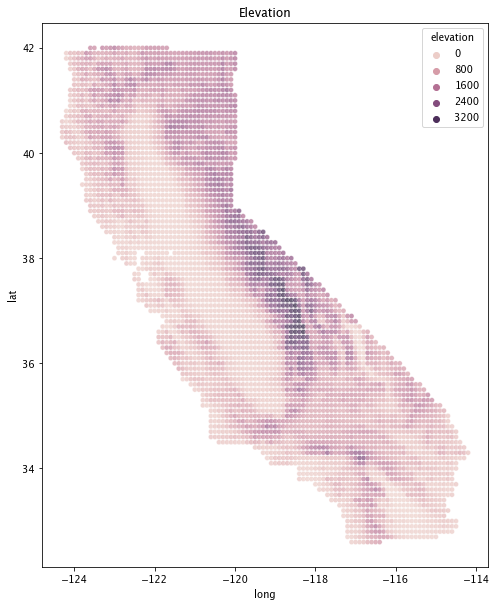

In [199]:
plt.figure(figsize=(8, 10))
plt.title('Elevation')
sns.scatterplot(x='long', y='lat', data=df_from_db, hue='elevation', alpha=0.7, s=25)
plt.show()

### Acknowledgements

1. This dataset utilizes the [Harmonized World Soil Database](https://www.fao.org/soils-portal/data-hub/soil-maps-and-databases/harmonized-world-soil-database-v12/en) by Fischer, G., F. Nachtergaele, S. Prieler, H.T. van Velthuizen, L. Verelst, D. Wiberg, 2008. Global Agro-ecological Zones Assessment for Agriculture (GAEZ 2008). IIASA, Laxenburg, Austria and FAO, Rome, Italy.